<a href="https://colab.research.google.com/github/pramodya99/Bearing-Fault-Prediction---CNN/blob/main/_2024_8_04_code_1_ipyn_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

path=r'/content/bsf'

filename = '/content/bsf/BSF_Fault T1- 2024-08-03.txt'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)




In [2]:
bearing_no=1

bearing_data = np.array(dataset.iloc[:,bearing_no-1])

bearing_data

array([20.50317049, 20.50317049, 20.50317049, ..., 26.86785812,
       27.52814196, 27.52814196])

In [3]:
temp = bearing_data
temp

array([20.50317049, 20.50317049, 20.50317049, ..., 26.86785812,
       27.52814196, 27.52814196])

In [4]:
feature_matrix=np.zeros((1,9))
def compute_skewness(x):

    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

def compute_kurtosis(x):

    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

feature_matrix




array([[34.73340755,  2.34957443, 20.42752027,  6.8096549 , 21.53185634,
        -0.51943686, -0.17647276,  1.61311719,  1.05406119]])

In [5]:
df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df

,0,1,2,3,4,5,6,7,8
/content/bsf/BSF_Fault T1- 2024-08-03.,34.733408,2.349574,20.42752,6.809655,21.531856,-0.519437,-0.176473,1.613117,1.054061


In [6]:
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/bsf'
for filename in os.listdir(path):

    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]

    Time_feature_matrix = pd.concat([Time_feature_matrix, df])



Time_feature_matrix



,0,1,2,3,4,5,6,7,8
BSF_Fault T10- 2024-08-06.,34.716107,1.794909,22.622040,5.407033,23.258788,-1.053336,1.615975,1.492602,1.028147
BSF_Fault T2- 2024-08-03.,1283.381558,0.960521,20.415995,58.290252,61.741946,16.473877,299.309203,20.786218,3.024195
BSF_Fault T7- 2024-08-06.,34.779580,2.131713,21.628714,5.439061,22.301634,-0.743204,1.005362,1.559508,1.031112
BSF_Fault T1- 2024-08-03.,34.733408,2.349574,20.427520,6.809655,21.531856,-0.519437,-0.176473,1.613117,1.054061
BSF_Fault T9- 2024-08-06.,34.779580,3.093525,21.637719,4.682008,22.138111,-0.768541,1.885671,1.571027,1.023126
BSF_Fault T8- 2024-08-06.,34.779580,2.279605,21.268935,5.175254,21.889065,-1.036721,1.881996,1.588902,1.029157
BSF_Fault T3- 2024-08-03.,34.710298,3.903665,22.667630,5.611280,23.351333,-0.964524,0.999814,1.486438,1.030162
BSF_Fault T4- 2024-08-06.,28.397408,0.776209,18.826724,5.777572,19.692672,-1.171827,0.898705,1.442029,1.045996
BSF_Fault T11- 2024-08-06.,34.779580,3.534077,23.368110,5.316244,23.964770,-0.536367,0.942749,1.451280,1.025533
BSF_Fault T5- 2024-08-06.,34.779580,3.344025,21.775422,5.474876,22.452645,-0.746564,1.179903,1.549019,1.031100


In [7]:
# If you still want to rename the columns
Time_feature_matrix.columns = ['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Form Factor']

# If you do not need to sort by datetime, you can skip the datetime conversion
# If you still want to sort alphabetically by filename:
Time_feature_matrix = Time_feature_matrix.sort_index()

# If you want to save the DataFrame to a CSV file
Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no, test_set))




Time_feature_matrix = Time_feature_matrix.sort_index()
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
BSF_Fault T1- 2024-08-03.,34.733408,2.349574,20.427520,6.809655,21.531856,-0.519437,-0.176473,1.613117,1.054061
BSF_Fault T10- 2024-08-06.,34.716107,1.794909,22.622040,5.407033,23.258788,-1.053336,1.615975,1.492602,1.028147
BSF_Fault T11- 2024-08-06.,34.779580,3.534077,23.368110,5.316244,23.964770,-0.536367,0.942749,1.451280,1.025533
BSF_Fault T2- 2024-08-03.,1283.381558,0.960521,20.415995,58.290252,61.741946,16.473877,299.309203,20.786218,3.024195
BSF_Fault T3- 2024-08-03.,34.710298,3.903665,22.667630,5.611280,23.351333,-0.964524,0.999814,1.486438,1.030162
BSF_Fault T4- 2024-08-06.,28.397408,0.776209,18.826724,5.777572,19.692672,-1.171827,0.898705,1.442029,1.045996
BSF_Fault T5- 2024-08-06.,34.779580,3.344025,21.775422,5.474876,22.452645,-0.746564,1.179903,1.549019,1.031100
BSF_Fault T6- 2024-08-06.,34.779580,1.538863,23.839016,5.127383,24.383793,-0.845692,1.520352,1.426340,1.022852
BSF_Fault T7- 2024-08-06.,34.779580,2.131713,21.628714,5.439061,22.301634,-0.743204,1.005362,1.559508,1.031112
BSF_Fault T8- 2024-08-06.,34.779580,2.279605,21.268935,5.175254,21.889065,-1.036721,1.881996,1.588902,1.029157


In [8]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')

df1
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv", index_col='Unnamed: 0')

# Add the new column with 'BSF' as the value for all rows
df1['fault'] = 'BSF'

# Save the updated DataFrame back to a CSV file if needed
df1.to_csv("Updated_Time_feature_matrix_Bearing_1_Test_2.csv")
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,fault
BSF_Fault T1- 2024-08-03.,34.733408,2.349574,20.427520,6.809655,21.531856,-0.519437,-0.176473,1.613117,1.054061,BSF
BSF_Fault T10- 2024-08-06.,34.716107,1.794909,22.622040,5.407033,23.258788,-1.053336,1.615975,1.492602,1.028147,BSF
BSF_Fault T11- 2024-08-06.,34.779580,3.534077,23.368110,5.316244,23.964770,-0.536367,0.942749,1.451280,1.025533,BSF
BSF_Fault T2- 2024-08-03.,1283.381558,0.960521,20.415995,58.290252,61.741946,16.473877,299.309203,20.786218,3.024195,BSF
BSF_Fault T3- 2024-08-03.,34.710298,3.903665,22.667630,5.611280,23.351333,-0.964524,0.999814,1.486438,1.030162,BSF
BSF_Fault T4- 2024-08-06.,28.397408,0.776209,18.826724,5.777572,19.692672,-1.171827,0.898705,1.442029,1.045996,BSF
BSF_Fault T5- 2024-08-06.,34.779580,3.344025,21.775422,5.474876,22.452645,-0.746564,1.179903,1.549019,1.031100,BSF
BSF_Fault T6- 2024-08-06.,34.779580,1.538863,23.839016,5.127383,24.383793,-0.845692,1.520352,1.426340,1.022852,BSF
BSF_Fault T7- 2024-08-06.,34.779580,2.131713,21.628714,5.439061,22.301634,-0.743204,1.005362,1.559508,1.031112,BSF
BSF_Fault T8- 2024-08-06.,34.779580,2.279605,21.268935,5.175254,21.889065,-1.036721,1.881996,1.588902,1.029157,BSF


In [9]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

# Define a mapping of fault types to folders
fault_folders = {
    'BSF': '/content/bsf',
    'FTF': '/content/ftf',
    'Inner Racer': '/content/inner',
    'Outer Racer': '/content/outer'
}
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof=1) ** 3
    return third_moment / s_3

def compute_kurtosis(x):
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof=1) ** 4
    return fourth_moment / s_4 - 3

def clean_data(data):
    # Convert data to numeric, coercing errors to NaN
    numeric_data = pd.to_numeric(data, errors='coerce')
    return numeric_data.dropna()  # Remove NaN values

# Initialize an empty DataFrame to hold all features
all_features = pd.DataFrame()

for fault_type, folder_path in fault_folders.items():
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):  # Check file extension
            dataset = pd.read_csv(os.path.join(folder_path, filename), sep='\t', header=None)
            bearing_no = 1  # Adjust as needed
            bearing_data = dataset.iloc[:, bearing_no - 1]

            # Clean the data
            bearing_data_clean = clean_data(bearing_data)

            if len(bearing_data_clean) == 0:  # Skip if all data was invalid
                print(f"Warning: No valid data in {filename}, skipping.")
                continue

            feature_matrix = np.zeros((1, 9))
            temp = bearing_data_clean.values  # Convert to numpy array

            feature_matrix[0, 0] = np.max(temp)
            feature_matrix[0, 1] = np.min(temp)
            feature_matrix[0, 2] = np.mean(temp)
            feature_matrix[0, 3] = np.std(temp, ddof=1)
            feature_matrix[0, 4] = np.sqrt(np.mean(temp ** 2))
            feature_matrix[0, 5] = compute_skewness(temp)
            feature_matrix[0, 6] = compute_kurtosis(temp)
            feature_matrix[0, 7] = feature_matrix[0, 0] / feature_matrix[0, 4]
            feature_matrix[0, 8] = feature_matrix[0, 4] / feature_matrix[0, 2]

            df = pd.DataFrame(feature_matrix, columns=['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Form Factor'])
            df.index = [filename[:-4]]  # Remove extension from filename

            # Add fault type column
            df['fault'] = fault_type

            # Append to the overall DataFrame
            all_features = pd.concat([all_features, df])


# Save the combined DataFrame to a CSV file
output_filename = 'Combined_Time_feature_matrix_all_faults.csv'
all_features.to_csv(output_filename)

# Optionally, view the combined DataFrame
print(f"Saved: {output_filename}")
print(all_features)

Saved: Combined_Time_feature_matrix_all_faults.csv
                                           Max       Min       Mean  \
BSF_Fault T10- 2024-08-06            34.716107  1.794909  22.622040   
BSF_Fault T2- 2024-08-03           1283.381558  0.960521  20.415995   
BSF_Fault T7- 2024-08-06             34.779580  2.131713  21.628714   
BSF_Fault T1- 2024-08-03             34.733408  2.349574  20.427520   
BSF_Fault T9- 2024-08-06             34.779580  3.093525  21.637719   
BSF_Fault T8- 2024-08-06             34.779580  2.279605  21.268935   
BSF_Fault T3- 2024-08-03             34.710298  3.903665  22.667630   
BSF_Fault T4- 2024-08-06             28.397408  0.776209  18.826724   
BSF_Fault T11- 2024-08-06            34.779580  3.534077  23.368110   
BSF_Fault T5- 2024-08-06             34.779580  3.344025  21.775422   
BSF_Fault T6- 2024-08-06             34.779580  1.538863  23.839016   
FTF_Fault T3- 2024-08-03           1154.858561  0.845399  13.751088   
FTF_Fault T7- 2024-08-06  

Unmapped values:
 Empty DataFrame
Columns: [Max, Min, Mean, Std, RMS, Skewness, Kurtosis, Crest Factor, Form Factor, fault]
Index: []
Conversion complete. Updated CSV saved.
Missing values before handling:
 Max             0
Min             0
Mean            0
Std             0
RMS             0
Skewness        0
Kurtosis        0
Crest Factor    0
Form Factor     0
fault           0
dtype: int64


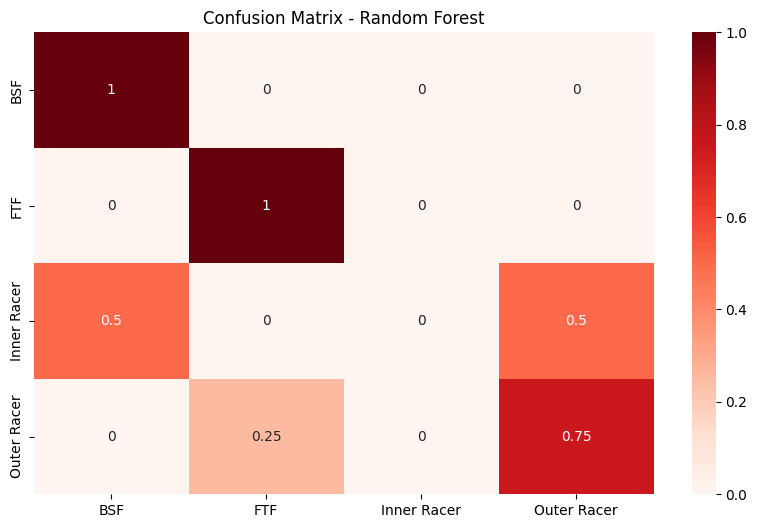

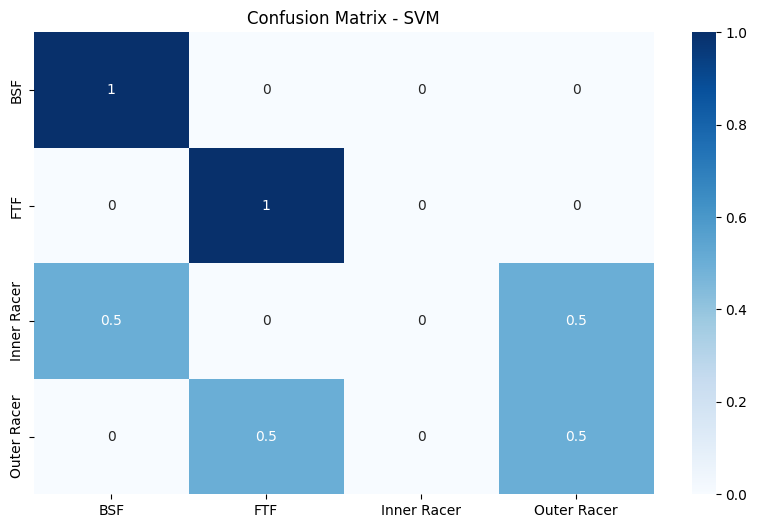

Classification Report - Random Forest
              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80         2
         2.0       0.50      1.00      0.67         1
         3.0       0.00      0.00      0.00         2
         4.0       0.75      0.75      0.75         4

    accuracy                           0.67         9
   macro avg       0.48      0.69      0.55         9
weighted avg       0.54      0.67      0.59         9

Classification Report - SVM
              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80         2
         2.0       0.33      1.00      0.50         1
         3.0       0.00      0.00      0.00         2
         4.0       0.67      0.50      0.57         4

    accuracy                           0.56         9
   macro avg       0.42      0.62      0.47         9
weighted avg       0.48      0.56      0.49         9

The fault type for code 1.0 is: BSF


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pickle

# Load data
df1 = pd.read_csv('/content/Combined_Time_feature_matrix_all_faults.csv')

# Drop the first column (index 0)
df1 = df1.drop(df1.columns[0], axis=1)

# Define the mapping from fault type strings to numerical values
fault_type_mapping = {
    'BSF': 1,
    'FTF': 2,
    'Inner Racer': 3,
    'Outer Racer': 4
}

# Convert fault type strings to numerical values using the mapping
df1['fault'] = df1['fault'].map(fault_type_mapping)

# Check for any unmapped values (optional)
unmapped_values = df1[df1['fault'].isna()]
print("Unmapped values:\n", unmapped_values)

# Save the updated DataFrame to a new CSV file
df1.to_csv('/content/Updated_Combined_Time_feature_matrix_all_faults.csv', index=False)

print("Conversion complete. Updated CSV saved.")

# Check for missing values in the dataset
print("Missing values before handling:\n", df1.isna().sum())

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

# Splitting data into features and labels
X = df_imputed.iloc[:, :-1]
y = df_imputed['fault']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Updated labels for confusion matrix (1, 2, 3, 4)
labels = [1, 2, 3, 4]

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels, normalize='true')
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, cmap="Reds", xticklabels=fault_type_mapping.keys(), yticklabels=fault_type_mapping.keys())
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels, normalize='true')
plt.figure(figsize=(10, 6))
sns.heatmap(cm_svm, annot=True, cmap="Blues", xticklabels=fault_type_mapping.keys(), yticklabels=fault_type_mapping.keys())
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification Report for Random Forest
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Classification Report for SVM
print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svm))

# Saving Random Forest Confusion Matrix
with open(r'C:\Users\User\Desktop\New folder\model.pickle', 'wb') as file:
    pickle.dump(cm_rf, file)

# Feature extraction functions
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof=1) ** 3
    return third_moment / s_3

def compute_kurtosis(x):
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof=1) ** 4
    return fourth_moment / s_4 - 3

def extract_features(bearing_data):
    feature_matrix = np.zeros((1, 9))
    feature_matrix[0, 0] = np.max(bearing_data)
    feature_matrix[0, 1] = np.min(bearing_data)
    feature_matrix[0, 2] = np.mean(bearing_data)
    feature_matrix[0, 3] = np.std(bearing_data, ddof=1)
    feature_matrix[0, 4] = np.sqrt(np.mean(bearing_data ** 2))
    feature_matrix[0, 5] = compute_skewness(bearing_data)
    feature_matrix[0, 6] = compute_kurtosis(bearing_data)
    feature_matrix[0, 7] = feature_matrix[0, 0] / feature_matrix[0, 4]
    feature_matrix[0, 8] = feature_matrix[0, 4] / feature_matrix[0, 2]
    return feature_matrix

# Load bearing data from file
bearing_data = np.loadtxt('/content/bsf/BSF_Fault T9- 2024-08-06.txt')

# Extract features using the function
features = extract_features(bearing_data)

# Make a prediction using the trained Random Forest model
predicted_code = rf_model.predict(features)[0]

# Reverse mapping to convert numbers back to fault types
reverse_fault_mapping = {v: k for k, v in fault_type_mapping.items()}

# Display the corresponding fault type
def display_fault_type(code):
    fault_type = reverse_fault_mapping.get(code, "Unknown code")
    print(f"The fault type for code {code} is: {fault_type}")

display_fault_type(predicted_code)